In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [61]:
data2 = pd.read_csv("Tela principal.csv")
data2.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8,latitude,longitude,elevation,status
0,2021-07-23T14:45:28+00:00,1,29.53333,42.33333,1007.36835,45.83022,150506.95313,4.0,399.66666,993.91217,NaN,NaN,NaN,NaN
1,2021-07-23T15:00:20+00:00,2,29.46667,42.23333,984.29810,45.80539,152103.51563,4.0,406.33334,971.15845,NaN,NaN,NaN,NaN
2,2021-07-23T15:15:18+00:00,3,28.80000,42.36666,971.95294,44.45118,152949.85938,4.0,392.66666,959.81915,NaN,NaN,NaN,NaN
3,2021-07-23T15:30:19+00:00,4,29.33333,41.70000,948.79443,45.02542,148586.29688,4.0,401.00000,936.60571,NaN,NaN,NaN,NaN
4,2021-07-23T15:45:19+00:00,5,29.33333,41.56667,918.42462,45.52543,151148.76563,3.0,393.66666,906.33417,NaN,NaN,NaN,NaN


In [62]:
data2.shape

(47590, 14)

In [63]:
data2.rename(columns = {"field1": "Room Temperature", "field2" : "Relative Humidity", "field8": "Solar Irradiance", "field5": "Iluminance", "field6": "UV", "field7": "CO2"}, inplace = True)

In [64]:
data2.head()

,created_at,entry_id,Room Temperature,Relative Humidity,field3,field4,Iluminance,UV,CO2,Solar Irradiance,latitude,longitude,elevation,status
0,2021-07-23T14:45:28+00:00,1,29.53333,42.33333,1007.36835,45.83022,150506.95313,4.0,399.66666,993.91217,NaN,NaN,NaN,NaN
1,2021-07-23T15:00:20+00:00,2,29.46667,42.23333,984.29810,45.80539,152103.51563,4.0,406.33334,971.15845,NaN,NaN,NaN,NaN
2,2021-07-23T15:15:18+00:00,3,28.80000,42.36666,971.95294,44.45118,152949.85938,4.0,392.66666,959.81915,NaN,NaN,NaN,NaN
3,2021-07-23T15:30:19+00:00,4,29.33333,41.70000,948.79443,45.02542,148586.29688,4.0,401.00000,936.60571,NaN,NaN,NaN,NaN
4,2021-07-23T15:45:19+00:00,5,29.33333,41.56667,918.42462,45.52543,151148.76563,3.0,393.66666,906.33417,NaN,NaN,NaN,NaN


In [65]:
data2.dtypes

created_at            object
entry_id               int64
Room Temperature     float64
Relative Humidity    float64
field3               float64
field4               float64
Iluminance           float64
UV                   float64
CO2                  float64
Solar Irradiance     float64
latitude             float64
longitude            float64
elevation            float64
status                object
dtype: object

In [66]:
data2["Date"] = pd.to_datetime(data2.created_at).dt.date
data2["Time"] = pd.to_datetime(data2.created_at).dt.time

In [67]:
data2 = data2.drop(["field3", "field4", "latitude", "longitude", "elevation", "created_at"], axis=1)

In [68]:
data2.head()

,entry_id,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,status,Date,Time
0,1,29.53333,42.33333,150506.95313,4.0,399.66666,993.91217,NaN,2021-07-23,14:45:28
1,2,29.46667,42.23333,152103.51563,4.0,406.33334,971.15845,NaN,2021-07-23,15:00:20
2,3,28.80000,42.36666,152949.85938,4.0,392.66666,959.81915,NaN,2021-07-23,15:15:18
3,4,29.33333,41.70000,148586.29688,4.0,401.00000,936.60571,NaN,2021-07-23,15:30:19
4,5,29.33333,41.56667,151148.76563,3.0,393.66666,906.33417,NaN,2021-07-23,15:45:19


In [69]:
data2.tail()

,entry_id,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,status,Date,Time
47585,47586,17.56667,99.69999,6035.72656,2.0,401.00000,95.95212,Normal Mode,2022-11-23,10:46:51
47586,47587,17.73333,99.69999,6020.13916,1.0,394.33334,97.07117,Normal Mode,2022-11-23,11:01:51
47587,47588,17.66667,99.69999,5648.97412,1.0,398.66666,93.94045,Normal Mode,2022-11-23,11:16:51
47588,47589,17.43333,99.69999,5569.63135,1.0,402.66666,93.26939,Normal Mode,2022-11-23,11:31:51
47589,47590,17.70000,99.69999,7502.36475,2.0,405.00000,121.06298,Normal Mode,2022-11-23,11:46:51


In [70]:
data2.dtypes

entry_id               int64
Room Temperature     float64
Relative Humidity    float64
Iluminance           float64
UV                   float64
CO2                  float64
Solar Irradiance     float64
status                object
Date                  object
Time                  object
dtype: object

In [71]:
data2.isna().sum()

entry_id                0
Room Temperature        0
Relative Humidity       0
Iluminance              0
UV                      0
CO2                     0
Solar Irradiance       10
status               8990
Date                    0
Time                    0
dtype: int64

In [72]:
data2

,entry_id,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,status,Date,Time
0,1,29.53333,42.33333,150506.95313,4.0,399.66666,993.91217,NaN,2021-07-23,14:45:28
1,2,29.46667,42.23333,152103.51563,4.0,406.33334,971.15845,NaN,2021-07-23,15:00:20
2,3,28.80000,42.36666,152949.85938,4.0,392.66666,959.81915,NaN,2021-07-23,15:15:18
3,4,29.33333,41.70000,148586.29688,4.0,401.00000,936.60571,NaN,2021-07-23,15:30:19
4,5,29.33333,41.56667,151148.76563,3.0,393.66666,906.33417,NaN,2021-07-23,15:45:19
...,...,...,...,...,...,...,...,...,...,...
47585,47586,17.56667,99.69999,6035.72656,2.0,401.00000,95.95212,Normal Mode,2022-11-23,10:46:51
47586,47587,17.73333,99.69999,6020.13916,1.0,394.33334,97.07117,Normal Mode,2022-11-23,11:01:51
47587,47588,17.66667,99.69999,5648.97412,1.0,398.66666,93.94045,Normal Mode,2022-11-23,11:16:51
47588,47589,17.43333,99.69999,5569.63135,1.0,402.66666,93.26939,Normal Mode,2022-11-23,11:31:51


In [73]:
data2['Date'] = pd.to_datetime(data2['Date'], format='%Y/%m/%d')

In [74]:
data2['Time'] = pd.to_datetime(data2['Time'], format='%H:%M:%S').dt.time

In [75]:
data2.dtypes

entry_id                      int64
Room Temperature            float64
Relative Humidity           float64
Iluminance                  float64
UV                          float64
CO2                         float64
Solar Irradiance            float64
status                       object
Date                 datetime64[ns]
Time                         object
dtype: object

In [76]:
data2['Datetime'] = pd.to_datetime(data2['Date'].astype(str) + ' ' + data2['Time'].astype(str))

In [77]:
data2

,entry_id,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,status,Date,Time,Datetime
0,1,29.53333,42.33333,150506.95313,4.0,399.66666,993.91217,NaN,2021-07-23,14:45:28,2021-07-23 14:45:28
1,2,29.46667,42.23333,152103.51563,4.0,406.33334,971.15845,NaN,2021-07-23,15:00:20,2021-07-23 15:00:20
2,3,28.80000,42.36666,152949.85938,4.0,392.66666,959.81915,NaN,2021-07-23,15:15:18,2021-07-23 15:15:18
3,4,29.33333,41.70000,148586.29688,4.0,401.00000,936.60571,NaN,2021-07-23,15:30:19,2021-07-23 15:30:19
4,5,29.33333,41.56667,151148.76563,3.0,393.66666,906.33417,NaN,2021-07-23,15:45:19,2021-07-23 15:45:19
...,...,...,...,...,...,...,...,...,...,...,...
47585,47586,17.56667,99.69999,6035.72656,2.0,401.00000,95.95212,Normal Mode,2022-11-23,10:46:51,2022-11-23 10:46:51
47586,47587,17.73333,99.69999,6020.13916,1.0,394.33334,97.07117,Normal Mode,2022-11-23,11:01:51,2022-11-23 11:01:51
47587,47588,17.66667,99.69999,5648.97412,1.0,398.66666,93.94045,Normal Mode,2022-11-23,11:16:51,2022-11-23 11:16:51
47588,47589,17.43333,99.69999,5569.63135,1.0,402.66666,93.26939,Normal Mode,2022-11-23,11:31:51,2022-11-23 11:31:51


In [78]:
df_hourly = data2.groupby(pd.Grouper(key='Datetime', freq='H')).mean()

In [79]:
df_hourly

,entry_id,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance
Datetime,,,,,,,
2021-07-23 14:00:00,1.0,29.533330,42.333330,150506.953130,4.00,399.666660,993.912170
2021-07-23 15:00:00,3.5,29.233332,41.966665,151197.109380,3.75,398.416665,943.479370
2021-07-23 16:00:00,7.5,27.941665,45.891665,156055.906253,3.00,400.250000,809.776350
2021-07-23 17:00:00,11.5,26.233335,51.433335,92234.465820,2.25,402.999995,607.010650
2021-07-23 18:00:00,15.5,24.241665,60.108338,31199.703858,2.00,400.916670,352.302945
...,...,...,...,...,...,...,...
2022-11-23 07:00:00,47572.5,16.824998,99.699990,114.379982,0.50,401.750005,1.794393
2022-11-23 08:00:00,47576.5,17.216665,99.699990,1547.932495,1.00,401.083335,25.146655
2022-11-23 09:00:00,47580.5,17.491667,99.666660,2537.841705,1.00,399.666665,38.343328


In [80]:
df_hourly.dtypes

entry_id             float64
Room Temperature     float64
Relative Humidity    float64
Iluminance           float64
UV                   float64
CO2                  float64
Solar Irradiance     float64
dtype: object

In [81]:
df_hourly = df_hourly.drop(["entry_id"], axis=1)

In [82]:
df_hourly.reset_index(inplace=True)

In [83]:
df_hourly["Date"] = pd.to_datetime(df_hourly.Datetime).dt.date
df_hourly["Time"] = pd.to_datetime(df_hourly.Datetime).dt.time

In [84]:
df_hourly

,Datetime,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,Date,Time
0,2021-07-23 14:00:00,29.533330,42.333330,150506.953130,4.00,399.666660,993.912170,2021-07-23,14:00:00
1,2021-07-23 15:00:00,29.233332,41.966665,151197.109380,3.75,398.416665,943.479370,2021-07-23,15:00:00
2,2021-07-23 16:00:00,27.941665,45.891665,156055.906253,3.00,400.250000,809.776350,2021-07-23,16:00:00
3,2021-07-23 17:00:00,26.233335,51.433335,92234.465820,2.25,402.999995,607.010650,2021-07-23,17:00:00
4,2021-07-23 18:00:00,24.241665,60.108338,31199.703858,2.00,400.916670,352.302945,2021-07-23,18:00:00
...,...,...,...,...,...,...,...,...,...
11705,2022-11-23 07:00:00,16.824998,99.699990,114.379982,0.50,401.750005,1.794393,2022-11-23,07:00:00
11706,2022-11-23 08:00:00,17.216665,99.699990,1547.932495,1.00,401.083335,25.146655,2022-11-23,08:00:00
11707,2022-11-23 09:00:00,17.491667,99.666660,2537.841705,1.00,399.666665,38.343328,2022-11-23,09:00:00
11708,2022-11-23 10:00:00,17.675000,99.274995,4636.991760,1.25,402.250000,72.960643,2022-11-23,10:00:00


In [85]:
df_hourly.to_excel("output.xlsx", sheet_name='Data') 

In [86]:
#--------------------------#

In [87]:
data1 = pd.read_csv("hora_dia.csv")
data1 = data1.drop("Tmod2", axis=1)
data1["Tmod"][7]

0.0004256169605145

In [88]:
data1.value_counts()

Tmod    
0.000000    4011
0.488511       2
0.645031       2
0.178369       2
0.331673       2
            ... 
0.230777       1
0.230545       1
0.230186       1
0.230185       1
1.000000       1
Length: 4745, dtype: int64

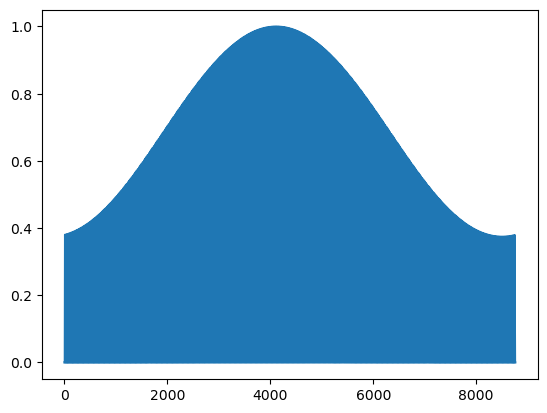

In [89]:
coluna = data1["Tmod"]
plt.plot(coluna)
plt.show()

In [90]:
a = np.array(data1["Tmod"])

new_df = pd.DataFrame(a.reshape((365, 24))).T

new_df

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000426,0.000404,0.000380,0.000371,0.000365,0.000364,0.000367,0.000373,0.000392,0.000409,...,0.001217,0.001076,0.000967,0.000859,0.000771,0.000699,0.000625,0.000566,0.000521,0.000482
8,0.076071,0.075870,0.075745,0.075686,0.075683,0.075777,0.075970,0.076243,0.076554,0.076958,...,0.082437,0.081538,0.080666,0.079874,0.079174,0.078499,0.077914,0.077420,0.076991,0.076627
9,0.194840,0.194863,0.194976,0.195173,0.195469,0.195834,0.196269,0.196791,0.197415,0.198127,...,0.199056,0.198286,0.197628,0.197034,0.196497,0.196077,0.195715,0.195418,0.195205,0.195080


In [91]:
new_df.to_excel("output1.xlsx", sheet_name='Tmod') 

In [92]:
df_final = pd.read_excel("dados.xlsx")

In [93]:
df_final

,Unnamed: 0,Datetime,entry_id,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,day_index,Date,Time,Unnamed: 12,Unnamed: 13,Tmod
0,0,44400.583333,1.0,29.533330,42.333330,150506.953130,4.00,399.666660,993.912170,204.0,44400,0.583333,14,14,0.801505
1,1,44400.625000,3.5,29.233332,41.966665,151197.109380,3.75,398.416665,943.479370,204.0,44400,15:00:00,15,15,0.656114
2,2,44400.666667,7.5,27.941665,45.891665,156055.906252,3.00,400.250000,809.776350,204.0,44400,16:00:00,16,16,0.500784
3,3,44400.708333,11.5,26.233335,51.433335,92234.465820,2.25,402.999995,607.010650,204.0,44400,17:00:00,17,17,0.343571
4,4,44400.750000,15.5,24.241665,60.108337,31199.703858,2.00,400.916670,352.302945,204.0,44400,18:00:00,18,18,0.188804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11705,11705,44888.291667,47572.5,16.824997,99.699990,114.379982,0.50,401.750005,1.794393,327.0,44888,07:00:00,7,7,0.017859
11706,11706,44888.333333,47576.5,17.216665,99.699990,1547.932495,1.00,401.083335,25.146655,327.0,44888,08:00:00,8,8,0.133963
11707,11707,44888.375000,47580.5,17.491667,99.666660,2537.841705,1.00,399.666665,38.343328,327.0,44888,09:00:00,9,9,0.249434
11708,11708,44888.416667,47584.5,17.675000,99.274995,4636.991760,1.25,402.250000,72.960643,327.0,44888,10:00:00,10,10,0.339375


In [94]:
df_final = df_final.drop(["Unnamed: 12","Unnamed: 13","Unnamed: 0" ], axis=1)

In [95]:
df_final["Tmod"].value_counts()

0.000000    5416
0.801505       2
0.267516       2
0.005919       2
0.071277       2
            ... 
0.530841       1
0.570812       1
0.557302       1
0.493384       1
0.052653       1
Name: Tmod, Length: 4710, dtype: int64

In [96]:
df3 = pd.concat([df_hourly, df_final["Tmod"]], axis=1)

In [97]:
# df3 = df3.drop(["entry_id" ], axis=1)

In [98]:
df3.reset_index()

,index,Datetime,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,Date,Time,Tmod
0,0,2021-07-23 14:00:00,29.533330,42.333330,150506.953130,4.00,399.666660,993.912170,2021-07-23,14:00:00,0.801505
1,1,2021-07-23 15:00:00,29.233332,41.966665,151197.109380,3.75,398.416665,943.479370,2021-07-23,15:00:00,0.656114
2,2,2021-07-23 16:00:00,27.941665,45.891665,156055.906253,3.00,400.250000,809.776350,2021-07-23,16:00:00,0.500784
3,3,2021-07-23 17:00:00,26.233335,51.433335,92234.465820,2.25,402.999995,607.010650,2021-07-23,17:00:00,0.343571
4,4,2021-07-23 18:00:00,24.241665,60.108338,31199.703858,2.00,400.916670,352.302945,2021-07-23,18:00:00,0.188804
...,...,...,...,...,...,...,...,...,...,...,...
11705,11705,2022-11-23 07:00:00,16.824998,99.699990,114.379982,0.50,401.750005,1.794393,2022-11-23,07:00:00,0.017859
11706,11706,2022-11-23 08:00:00,17.216665,99.699990,1547.932495,1.00,401.083335,25.146655,2022-11-23,08:00:00,0.133963
11707,11707,2022-11-23 09:00:00,17.491667,99.666660,2537.841705,1.00,399.666665,38.343328,2022-11-23,09:00:00,0.249434
11708,11708,2022-11-23 10:00:00,17.675000,99.274995,4636.991760,1.25,402.250000,72.960643,2022-11-23,10:00:00,0.339375


In [99]:
df3["Tmod"].value_counts()

0.000000    5416
0.801505       2
0.267516       2
0.005919       2
0.071277       2
            ... 
0.530841       1
0.570812       1
0.557302       1
0.493384       1
0.052653       1
Name: Tmod, Length: 4710, dtype: int64

In [100]:
df3["Tmod"].max()

1.0

In [101]:
maximos = df3.groupby('Date')['Tmod'].max()
maximos

Date
2021-07-23    0.801505
2021-07-24    0.951257
2021-07-25    0.948379
2021-07-26    0.945422
2021-07-27    0.942389
                ...   
2022-11-19    0.419433
2022-11-20    0.416700
2022-11-21    0.414046
2022-11-22    0.411477
2022-11-23    0.395013
Name: Tmod, Length: 489, dtype: float64

In [102]:
maximos[0]

0.80150488822563

In [103]:
df3

,Datetime,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,Date,Time,Tmod
0,2021-07-23 14:00:00,29.533330,42.333330,150506.953130,4.00,399.666660,993.912170,2021-07-23,14:00:00,0.801505
1,2021-07-23 15:00:00,29.233332,41.966665,151197.109380,3.75,398.416665,943.479370,2021-07-23,15:00:00,0.656114
2,2021-07-23 16:00:00,27.941665,45.891665,156055.906253,3.00,400.250000,809.776350,2021-07-23,16:00:00,0.500784
3,2021-07-23 17:00:00,26.233335,51.433335,92234.465820,2.25,402.999995,607.010650,2021-07-23,17:00:00,0.343571
4,2021-07-23 18:00:00,24.241665,60.108338,31199.703858,2.00,400.916670,352.302945,2021-07-23,18:00:00,0.188804
...,...,...,...,...,...,...,...,...,...,...
11705,2022-11-23 07:00:00,16.824998,99.699990,114.379982,0.50,401.750005,1.794393,2022-11-23,07:00:00,0.017859
11706,2022-11-23 08:00:00,17.216665,99.699990,1547.932495,1.00,401.083335,25.146655,2022-11-23,08:00:00,0.133963
11707,2022-11-23 09:00:00,17.491667,99.666660,2537.841705,1.00,399.666665,38.343328,2022-11-23,09:00:00,0.249434
11708,2022-11-23 10:00:00,17.675000,99.274995,4636.991760,1.25,402.250000,72.960643,2022-11-23,10:00:00,0.339375


In [104]:
y = pd.merge(right=df3,
         left = df3.groupby("Date").agg({"Tmod":max}).reset_index(),
         right_on = "Date",
         left_on = "Date")
y

,Date,Tmod_x,Datetime,Room Temperature,Relative Humidity,Iluminance,UV,CO2,Solar Irradiance,Time,Tmod_y
0,2021-07-23,0.801505,2021-07-23 14:00:00,29.533330,42.333330,150506.953130,4.00,399.666660,993.912170,14:00:00,0.801505
1,2021-07-23,0.801505,2021-07-23 15:00:00,29.233332,41.966665,151197.109380,3.75,398.416665,943.479370,15:00:00,0.656114
2,2021-07-23,0.801505,2021-07-23 16:00:00,27.941665,45.891665,156055.906253,3.00,400.250000,809.776350,16:00:00,0.500784
3,2021-07-23,0.801505,2021-07-23 17:00:00,26.233335,51.433335,92234.465820,2.25,402.999995,607.010650,17:00:00,0.343571
4,2021-07-23,0.801505,2021-07-23 18:00:00,24.241665,60.108338,31199.703858,2.00,400.916670,352.302945,18:00:00,0.188804
...,...,...,...,...,...,...,...,...,...,...,...
11705,2022-11-23,0.395013,2022-11-23 07:00:00,16.824998,99.699990,114.379982,0.50,401.750005,1.794393,07:00:00,0.017859
11706,2022-11-23,0.395013,2022-11-23 08:00:00,17.216665,99.699990,1547.932495,1.00,401.083335,25.146655,08:00:00,0.133963
11707,2022-11-23,0.395013,2022-11-23 09:00:00,17.491667,99.666660,2537.841705,1.00,399.666665,38.343328,09:00:00,0.249434
11708,2022-11-23,0.395013,2022-11-23 10:00:00,17.675000,99.274995,4636.991760,1.25,402.250000,72.960643,10:00:00,0.339375


In [105]:
my_df = y[["Date","Tmod_x","Tmod_y","Solar Irradiance","Time", "Relative Humidity", "Room Temperature"]]
mydf24 = my_df[my_df["Date"]==my_df.iloc[10]["Date"]]
mydf24

,Date,Tmod_x,Tmod_y,Solar Irradiance,Time,Relative Humidity,Room Temperature
10,2021-07-24,0.951257,0.000000,0.000000,00:00:00,85.100003,17.208333
11,2021-07-24,0.951257,0.000000,0.000000,01:00:00,85.475000,16.583333
12,2021-07-24,0.951257,0.000000,0.000000,02:00:00,89.525000,16.066668
13,2021-07-24,0.951257,0.000000,0.000000,03:00:00,92.050003,15.641665
14,2021-07-24,0.951257,0.000000,0.000000,04:00:00,94.158338,15.383332
15,2021-07-24,0.951257,0.015216,0.775383,05:00:00,93.644447,15.666667
16,2021-07-24,0.951257,0.141147,36.294337,06:00:00,91.574997,16.341665
17,2021-07-24,0.951257,0.294574,74.502580,07:00:00,75.208335,20.016668
18,2021-07-24,0.951257,0.451474,234.442123,08:00:00,58.908333,23.808332
19,2021-07-24,0.951257,0.607900,464.682945,09:00:00,49.375000,26.583335


In [106]:
mydf24[mydf24["Tmod_y"]==mydf24["Tmod_y"].max()].index[0]

22

In [107]:
###get dates

dates = my_df["Date"].unique()

In [108]:
#access a single day
dfs_per_day = [my_df[my_df["Date"]==date] for date in dates]
# my_df[my_df["Date"]==dates[1]]
dfs_per_day[1]
len(dfs_per_day)

489

In [109]:
df_temp = dfs_per_day[1]
df_temp
# df_temp["Solar Irradiance2"] = df_temp["Solar Irradiance"].shift(periods=1, fill_value=0).rename("Solar Irradiance 2")
# df_temp

,Date,Tmod_x,Tmod_y,Solar Irradiance,Time,Relative Humidity,Room Temperature
10,2021-07-24,0.951257,0.000000,0.000000,00:00:00,85.100003,17.208333
11,2021-07-24,0.951257,0.000000,0.000000,01:00:00,85.475000,16.583333
12,2021-07-24,0.951257,0.000000,0.000000,02:00:00,89.525000,16.066668
13,2021-07-24,0.951257,0.000000,0.000000,03:00:00,92.050003,15.641665
14,2021-07-24,0.951257,0.000000,0.000000,04:00:00,94.158338,15.383332
15,2021-07-24,0.951257,0.015216,0.775383,05:00:00,93.644447,15.666667
16,2021-07-24,0.951257,0.141147,36.294337,06:00:00,91.574997,16.341665
17,2021-07-24,0.951257,0.294574,74.502580,07:00:00,75.208335,20.016668
18,2021-07-24,0.951257,0.451474,234.442123,08:00:00,58.908333,23.808332
19,2021-07-24,0.951257,0.607900,464.682945,09:00:00,49.375000,26.583335


In [114]:
df_temp  = concat_solar(df_temp)

C:\Users\menez\AppData\Local\Temp\ipykernel_12128\1283443518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Solar Irradiance 2"] = df["Solar Irradiance"].shift(periods=1, fill_value=0).rename("Solar Irradiance 2")


In [115]:
df_temp

,Date,Tmod_x,Tmod_y,Solar Irradiance,Time,Relative Humidity,Room Temperature,Solar Irradiance 2
0,2021-07-24,0.951257,0.000000,0.000000,00:00:00,85.100003,17.208333,0.000000
1,2021-07-24,0.951257,0.000000,0.000000,01:00:00,85.475000,16.583333,0.000000
2,2021-07-24,0.951257,0.000000,0.000000,02:00:00,89.525000,16.066668,0.000000
3,2021-07-24,0.951257,0.000000,0.000000,03:00:00,92.050003,15.641665,0.000000
4,2021-07-24,0.951257,0.000000,0.000000,04:00:00,94.158338,15.383332,0.000000
5,2021-07-24,0.951257,0.015216,0.775383,05:00:00,93.644447,15.666667,0.000000
6,2021-07-24,0.951257,0.141147,36.294337,06:00:00,91.574997,16.341665,0.775383
7,2021-07-24,0.951257,0.294574,74.502580,07:00:00,75.208335,20.016668,36.294337
8,2021-07-24,0.951257,0.451474,234.442123,08:00:00,58.908333,23.808332,74.502580
9,2021-07-24,0.951257,0.607900,464.682945,09:00:00,49.375000,26.583335,234.442123


In [117]:
df_temp = compare_tmod(df_temp)

In [119]:
df_temp = solar_diference(df_temp)

In [121]:
df_temp = compare(df_temp)

In [122]:
main(humidity,date)

TypeError: main() takes 1 positional argument but 2 were given

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
df_done = []
bugs = []

for i, df in enumerate(dfs_per_day):
    try:
        df = concat_solar(df)
        df = compare_tmod(df)
        df = solar_diference(df)
        df = compare(df)
        df_done.append(df)
    except:
        bugs.append(i)

In [127]:
final_df = pd.concat(df_done)
final_df.to_csv("final_df.csv", index=False)

In [128]:
bugs

[174]

In [129]:
dfs_per_day[174]

,Date,Tmod_x,Tmod_y,Solar Irradiance,Time,Relative Humidity,Room Temperature,Solar Irradiance 2
4162,2022-01-13,NaN,NaN,0.000000,00:00:00,84.166668,10.933333,0.000000
4163,2022-01-13,NaN,NaN,0.000000,01:00:00,81.883332,10.383335,0.000000
4164,2022-01-13,NaN,NaN,0.000000,02:00:00,82.758332,9.650000,0.000000
4165,2022-01-13,NaN,NaN,0.000000,03:00:00,85.433335,8.908335,0.000000
4166,2022-01-13,NaN,NaN,0.000000,04:00:00,88.575002,8.233332,0.000000
4167,2022-01-13,NaN,NaN,0.000000,05:00:00,89.849995,7.724997,0.000000
4168,2022-01-13,NaN,NaN,0.237495,06:00:00,93.358330,7.183333,0.000000
4169,2022-01-13,NaN,NaN,0.442918,07:00:00,93.825002,7.033333,0.237495
4170,2022-01-13,NaN,NaN,13.277542,08:00:00,86.566667,8.541667,0.442918
4171,2022-01-13,NaN,NaN,88.652605,09:00:00,70.183333,12.808333,13.277542


In [130]:
final_df = pd.read_csv("final_df.csv")

In [131]:
final_df

,Date,Tmod_x,Tmod_y,Solar Irradiance,Time,Relative Humidity,Room Temperature,Solar Irradiance 2,T_mod_comp,Solar_diference,sunny
0,2021-07-23,0.801505,0.801505,993.912170,14:00:00,42.333330,29.533330,0.000000,True,993.912170,False
1,2021-07-23,0.801505,0.656114,943.479370,15:00:00,41.966665,29.233332,993.912170,False,-50.432800,True
2,2021-07-23,0.801505,0.500784,809.776350,16:00:00,45.891665,27.941665,943.479370,False,-133.703020,True
3,2021-07-23,0.801505,0.343571,607.010650,17:00:00,51.433335,26.233335,809.776350,False,-202.765700,True
4,2021-07-23,0.801505,0.188804,352.302945,18:00:00,60.108338,24.241665,607.010650,False,-254.707705,True
...,...,...,...,...,...,...,...,...,...,...,...
11681,2022-11-23,0.395013,0.017859,1.794393,07:00:00,99.699990,16.824998,0.000000,False,1.794393,True
11682,2022-11-23,0.395013,0.133963,25.146655,08:00:00,99.699990,17.216665,1.794393,False,23.352262,True
11683,2022-11-23,0.395013,0.249434,38.343328,09:00:00,99.666660,17.491667,25.146655,False,13.196673,True
11684,2022-11-23,0.395013,0.339375,72.960643,10:00:00,99.274995,17.675000,38.343328,False,34.617315,True


In [132]:
final_df["Date"] = pd.to_datetime(final_df["Date"])

In [133]:
final_df["Day_index"] = df_final["day_index"]

In [134]:
final_df

,Date,Tmod_x,Tmod_y,Solar Irradiance,Time,Relative Humidity,Room Temperature,Solar Irradiance 2,T_mod_comp,Solar_diference,sunny,Day_index
0,2021-07-23,0.801505,0.801505,993.912170,14:00:00,42.333330,29.533330,0.000000,True,993.912170,False,204.0
1,2021-07-23,0.801505,0.656114,943.479370,15:00:00,41.966665,29.233332,993.912170,False,-50.432800,True,204.0
2,2021-07-23,0.801505,0.500784,809.776350,16:00:00,45.891665,27.941665,943.479370,False,-133.703020,True,204.0
3,2021-07-23,0.801505,0.343571,607.010650,17:00:00,51.433335,26.233335,809.776350,False,-202.765700,True,204.0
4,2021-07-23,0.801505,0.188804,352.302945,18:00:00,60.108338,24.241665,607.010650,False,-254.707705,True,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,2022-11-23,0.395013,0.017859,1.794393,07:00:00,99.699990,16.824998,0.000000,False,1.794393,True,326.0
11682,2022-11-23,0.395013,0.133963,25.146655,08:00:00,99.699990,17.216665,1.794393,False,23.352262,True,326.0
11683,2022-11-23,0.395013,0.249434,38.343328,09:00:00,99.666660,17.491667,25.146655,False,13.196673,True,326.0
11684,2022-11-23,0.395013,0.339375,72.960643,10:00:00,99.274995,17.675000,38.343328,False,34.617315,True,326.0


In [136]:
sunny_day(final_df)

,Date,day_status
0,2021-07-23,Cloudy
1,2021-07-24,Sunny
2,2021-07-25,Sunny
3,2021-07-26,Sunny
4,2021-07-27,Sunny
...,...,...
483,2022-11-19,Sunny
484,2022-11-20,Sunny
485,2022-11-21,Sunny
486,2022-11-22,Sunny


In [137]:
df = final_df.drop(final_df[final_df['Tmod_y'] == 0].index)

In [138]:
df.to_csv("final_project.csv")

In [139]:
df = pd.read_csv("final_project.csv").reset_index()

In [140]:
df = df.drop("Unnamed: 0",axis=1)

In [141]:
y = df['Solar Irradiance']
X = df[['Day_index', 'Tmod_y', "Relative Humidity"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [142]:
X.dtypes

Day_index            float64
Tmod_y               float64
Relative Humidity    float64
dtype: object

In [143]:
#!pip install xgboost

In [144]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

0.8060088598976871

In [145]:
pred = xgb_reg.predict(X_test)

In [146]:
np.sqrt(mean_squared_error(y_test,pred))

113.67910318485235

In [147]:
def zero_solar_irrad(df):
    df['Solar_Irradiance'] = df.apply(lambda row: 0 if row['Tmod_y'] == 0 else row['Solar_Irradiance'], axis=1)
    return df

In [160]:
def main_pred(humidity, date):
    date_obj = datetime.strptime(date, '%d-%m-%Y').date()
    day_of_year = date_obj.timetuple().tm_yday
    
    df_tmod = pd.read_excel("T_mod.xlsx")
    df_tmod = df_tmod.drop("Time", axis=1)
    test = df_tmod[df_tmod["Day_index"] == day_of_year]
    test["Relative Humidity"] = float(humidity)
    
    data_pred = xgb_reg.predict(test)
    df1 = pd.DataFrame(data_pred, columns=['Solar_Irradiance'])
    
    df2 = test.copy()
    df2["Solar_Irradiance"] = df1["Solar_Irradiance"].values
    df3 = zero_solar_irrad(df2) # call the zero_solar_irrad function here
    
    # create final dataframe
    df_final = pd.concat([df3["Day_index"], df3["Relative Humidity"], df3["Tmod_y"], df3["Solar_Irradiance"]], axis=1)
    
    return df_final

In [150]:
humidity = input()
date = input()

30
12-03-2023


In [163]:
a = main_pred(humidity,date)

In [165]:
a

,Day_index,Relative Humidity,Tmod_y,Solar_Irradiance
1680,71.0,30.0,0.000000,0.000000
1681,71.0,30.0,0.000000,0.000000
1682,71.0,30.0,0.000000,0.000000
1683,71.0,30.0,0.000000,0.000000
1684,71.0,30.0,0.000000,0.000000
1685,71.0,30.0,0.000000,0.000000
1686,71.0,30.0,0.000509,87.235756
1687,71.0,30.0,0.090410,232.484192
1688,71.0,30.0,0.241804,417.976624
1689,71.0,30.0,0.382506,569.452576


In [169]:
def concat_solar(df):
    df["Solar Irradiance 2"] = df["Solar_Irradiance"].shift(periods=1, fill_value=0).rename("Solar Irradiance 2")
    return df.reset_index(drop=True)


In [186]:
def compare_tmod(df):
    df["Tmod_x"] = df["Tmod_y"].max()
    df["T_mod_comp"] =df["Tmod_y"] ==df["Tmod_x"]
    return df

In [183]:
def solar_diference(df):
    df["Solar_diference"] = df["Solar_Irradiance"] - df["Solar Irradiance 2"]
    return df

In [184]:
def compare(df):
    counter = 0
    results = []
    t_mod_list = list(df["T_mod_comp"])
    index = t_mod_list.index(True)
    solar_list = list(df["Solar_diference"])
    for i in solar_list:
        if counter < index:
            results.append(i>=0)
            counter+=1
        else:
            results.append(i<=0)
            counter+=1
    df["sunny"] = results           
    return df
    


In [191]:
def main(df):
    df = concat_solar(df)
    df = compare_tmod(df)
    df = solar_diference(df)
    df = compare(df)

    return df

In [205]:
b = main(a)

In [206]:
b

,Day_index,Relative Humidity,Tmod_y,Solar_Irradiance,Solar Irradiance 2,Tmod_x,T_mod_comp,Solar_diference,sunny
0,71.0,30.0,0.000000,0.000000,0.000000,0.633561,False,0.000000,True
1,71.0,30.0,0.000000,0.000000,0.000000,0.633561,False,0.000000,True
2,71.0,30.0,0.000000,0.000000,0.000000,0.633561,False,0.000000,True
3,71.0,30.0,0.000000,0.000000,0.000000,0.633561,False,0.000000,True
4,71.0,30.0,0.000000,0.000000,0.000000,0.633561,False,0.000000,True
5,71.0,30.0,0.000000,0.000000,0.000000,0.633561,False,0.000000,True
6,71.0,30.0,0.000509,87.235756,0.000000,0.633561,False,87.235756,True
7,71.0,30.0,0.090410,232.484192,87.235756,0.633561,False,145.248436,True
8,71.0,30.0,0.241804,417.976624,232.484192,0.633561,False,185.492432,True
9,71.0,30.0,0.382506,569.452576,417.976624,0.633561,False,151.475952,True


In [203]:
def cloudy_check(df):
    a = list(df["sunny"])
    if len(a) == sum(a):
        return "Sunny"
    else:
        return "Cloudy"

In [204]:
cloudy_check(b)

'Cloudy'